# Outliers

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio
data = {'Valori': [1, 2, 3, 4, 5, 10, 15, 20, 25, 300, 1000, 100000000, -50000000, -50]}
df = pd.DataFrame(data)
# Lista con outliers da entrambi i lati

# Calcola la media e la deviazione standard
mean_value = df['Valori'].mean()
std_dev = df['Valori'].std()

# Identifica gli outliers considerando ±3 sigma dalla media
outliers = df[(df['Valori'] > mean_value + 3 * std_dev) | (df['Valori'] < mean_value - 3 * std_dev)]
outliers

,Valori
11,100000000


# Grafico con outliers evidenziati

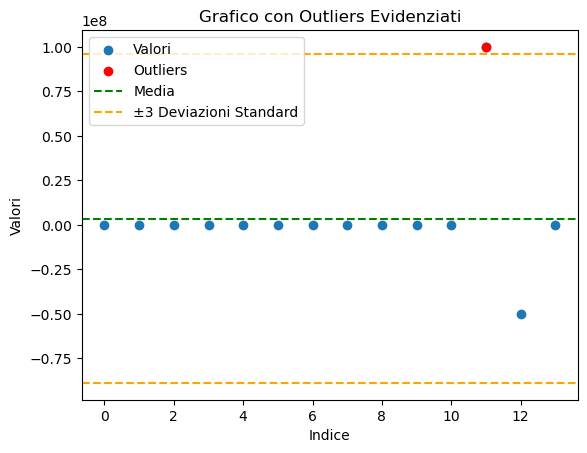

In [5]:
# Crea un grafico a dispersione
plt.scatter(df.index, df['Valori'], label='Valori')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio con 4 features
data = {'Feature1': [1, 2000, 3, 4, 50000, 10, 15, 20, 2500000, 300000000, 100000000],
        'Feature2': [2, 4, 6, 8, 10, 20, 30, 40, 50000, 60, 200],
        'Feature3': [5, 10, 15, 20000, 25, 50, 75, 100, 125, 150, 500000],
        'Feature4': [1, -20000000, 3, 4000000000, 5, 10, 15, 20, 20005, 30, 10000]}

df = pd.DataFrame(data)

# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k=2 #intervallo di confidenza 

# Lista per salvare gli indici degli outliers
outlier_indices = []

# Itera su ogni feature
for feature in df.columns:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()
    
    # Identifica gli outliers per ciascuna feature
    df['Outlier_' + feature] = (df[feature] > mean_value + k * std_dev) | (df[feature] < mean_value - k * std_dev)

In [4]:
# Calcola il numero di features che superano la soglia per ogni riga
df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers
0,1,2,5,1,False,False,False,False,0
1,2000,4,10,-20000000,False,False,False,False,0
2,3,6,15,3,False,False,False,False,0
3,4,8,20000,4000000000,False,False,False,True,1
4,50000,10,25,5,False,False,False,False,0
5,10,20,50,10,False,False,False,False,0
6,15,30,75,15,False,False,False,False,0
7,20,40,100,20,False,False,False,False,0
8,2500000,50000,125,20005,False,True,False,False,1
9,300000000,60,150,30,True,False,False,False,1


In [5]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers = df[df['Num_Outliers'] >= min_features_threshold]

# Aggiungi una colonna che indica se il record è un outlier o meno
df['Is_Outlier'] = df.index.isin(outliers.index)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers,Is_Outlier
0,1,2,5,1,False,False,False,False,0,False
1,2000,4,10,-20000000,False,False,False,False,0,False
2,3,6,15,3,False,False,False,False,0,False
3,4,8,20000,4000000000,False,False,False,True,1,True
4,50000,10,25,5,False,False,False,False,0,False
5,10,20,50,10,False,False,False,False,0,False
6,15,30,75,15,False,False,False,False,0,False
7,20,40,100,20,False,False,False,False,0,False
8,2500000,50000,125,20005,False,True,False,False,1,True
9,300000000,60,150,30,True,False,False,False,1,True


In [6]:
# Rimuovi colonne ausiliarie
df.drop(df.filter(like='Outlier_').columns, axis=1, inplace=True)
df.drop('Num_Outliers', axis=1, inplace=True)
df

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,2000,4,10,-20000000,False
2,3,6,15,3,False
3,4,8,20000,4000000000,True
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False
8,2500000,50000,125,20005,True
9,300000000,60,150,30,True


# Come vengono rappresentati gli outliers di più features

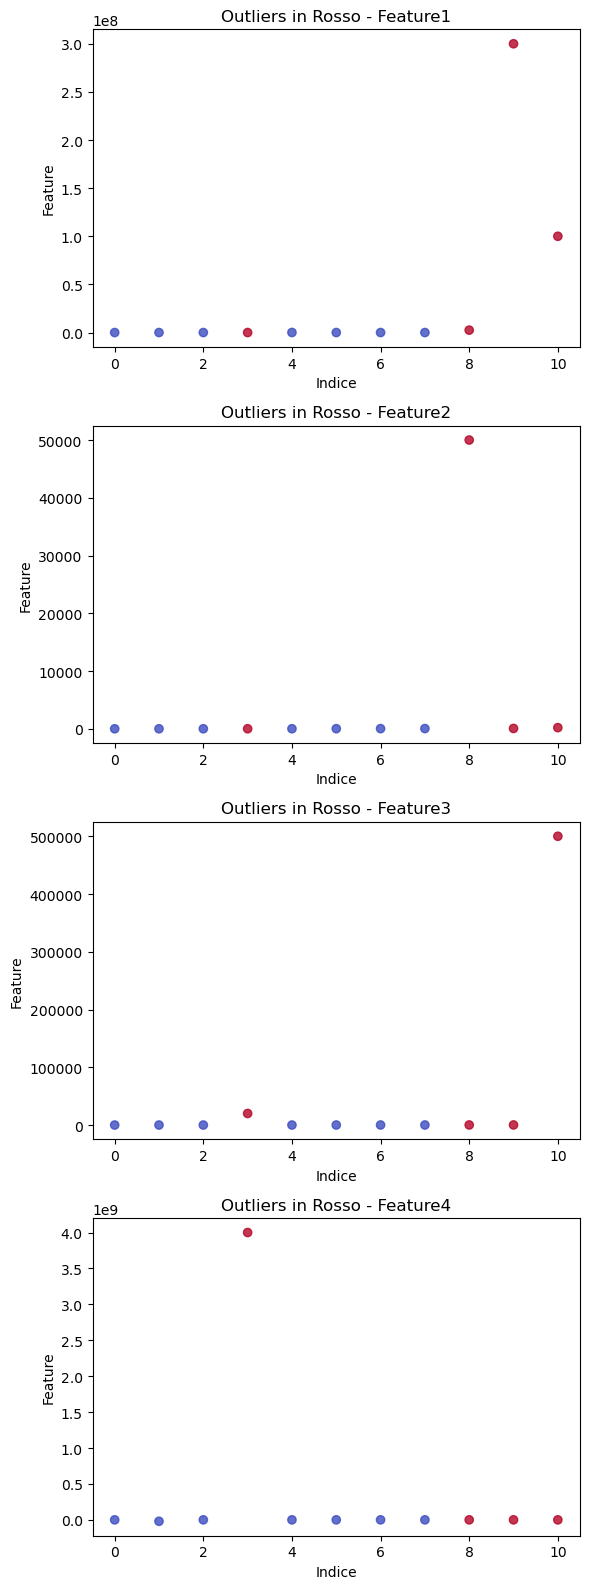

In [7]:
# Organizza i grafici in una matrice, con una colonna e 4 righe
num_features = len(df.columns) - 1  # Escludi la colonna 'Is_Outlier'
num_rows = num_features
num_cols = 1  # Una colonna

plt.figure(figsize=(6, 4 * num_rows))
for i, feature in enumerate(df.columns[:-1]):  # Escludi la colonna 'Is_Outlier'
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha=0.8)
    plt.title(f'Outliers in Rosso - {feature}')
    plt.xlabel('Indice')
    plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [8]:
#Elimina le righe corrispondenti agli outliers quelli che hanno almeno una feature fuori scala
df_filtred = df[df['Is_Outlier'] == False]
df_filtred

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,2000,4,10,-20000000,False
2,3,6,15,3,False
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False


# Calcolare la deviazione standard

In [1]:
def calcola_deviazione_standard(lista):
    n = len(lista)
    
    # Calcola la media
    media = sum(lista) / n
    
    # Calcola la somma dei quadrati delle differenze dalla media
    somma_quadrati_diff = sum((x - media) ** 2 for x in lista)
    
    # Calcola la deviazione standard
    deviazione_standard = (somma_quadrati_diff / n) ** 0.5
    
    return deviazione_standard

# Esempio di utilizzo
numero_lista = [1, 2, 3, 4, 5]
deviazione_standard = calcola_deviazione_standard(numero_lista)

# Stampa il risultato
print(f"La deviazione standard della lista è: {deviazione_standard}")

La deviazione standard della lista è: 1.4142135623730951


# Splitting dataset

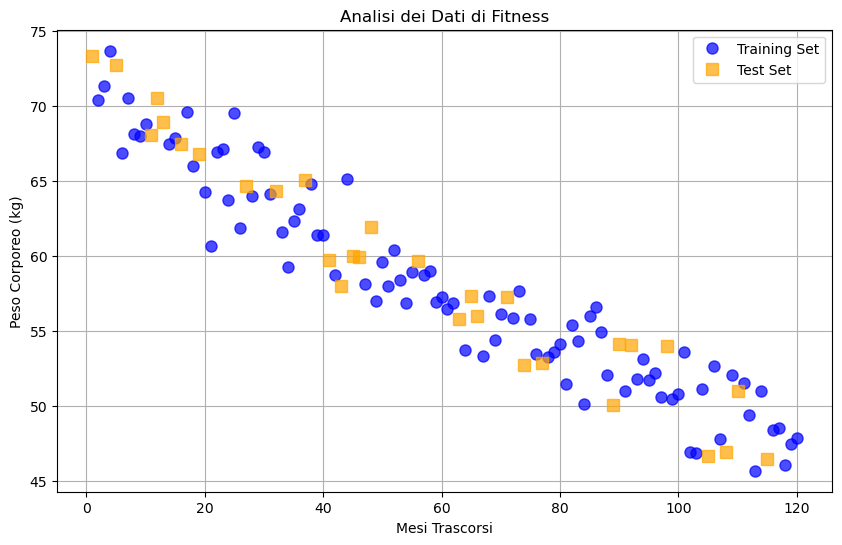

Dimensioni del Training Set (mesi trascorsi e peso corporeo): (90,) (90,)
Dimensioni del Test Set (mesi trascorsi e peso corporeo): (30,) (30,)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creazione di dati casuali per mesi trascorsi e peso corporeo
np.random.seed(0)
n=120
mesi_trascorsi = np.arange(1, n+1)
peso_corporeo = 70 - 0.2 * mesi_trascorsi + np.random.normal(0, 2, n)

# Suddivisione del dataset in training set (75%) e test set (25%)
X_train, X_test, y_train, y_test = train_test_split(mesi_trascorsi, peso_corporeo, test_size=0.25, random_state=42)

# Creazione di un grafico a linee
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Training Set', marker='o', color='blue', linestyle='', markersize=8,alpha=0.7)
plt.plot(X_test, y_test, label='Test Set', marker='s', color='orange', linestyle='', markersize=8,alpha=0.7)
plt.xlabel('Mesi Trascorsi')
plt.ylabel('Peso Corporeo (kg)')
plt.title('Analisi dei Dati di Fitness')
plt.legend()
plt.grid(True)
plt.show()

# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (mesi trascorsi e peso corporeo):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (mesi trascorsi e peso corporeo):", X_test.shape, y_test.shape)

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(1)
# Supponiamo di avere un dataset con feature X e target y
X = np.random.rand(100, 2)  # Dati del dataset (100 campioni, 2 feature)
y = np.random.choice(['A', 'B'], size=100)  # Etichette di classe casuali
# Calcola le proporzioni delle classi nel dataset originale
proporzione_classe_A = sum(y == 'A') / len(y)
proporzione_classe_B = 1 - proporzione_classe_A
# Eseguire uno split stratificato con una proporzione specificata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Calcola le proporzioni delle classi nel training set e nel test set
proporzione_classe_A_train = sum(y_train == 'A') / len(y_train)
proporzione_classe_B_train = 1 - proporzione_classe_A_train

proporzione_classe_A_test = sum(y_test == 'A') / len(y_test)
proporzione_classe_B_test = 1 - proporzione_classe_A_test

# Stampa delle proporzioni
print("Proporzione Classe A nel data Set completo:", proporzione_classe_A)
print("Proporzione Classe B nel data Setcompleto:", proporzione_classe_B)
print("Proporzione Classe A nel Training Set:", proporzione_classe_A_train)
print("Proporzione Classe B nel Training Set:", proporzione_classe_B_train)
print("Proporzione Classe A nel Test Set:", proporzione_classe_A_test)
print("Proporzione Classe B nel Test Set:", proporzione_classe_B_test)

Proporzione Classe A nel data Set completo: 0.54
Proporzione Classe B nel data Setcompleto: 0.45999999999999996
Proporzione Classe A nel Training Set: 0.5285714285714286
Proporzione Classe B nel Training Set: 0.4714285714285714
Proporzione Classe A nel Test Set: 0.5666666666666667
Proporzione Classe B nel Test Set: 0.43333333333333335
